# **Sentiment Analysis On Movie Reviews**
---
                                                                 Name : VISHNU E
                                                                 Organization : CognoRise InfoTech
                                                                 Date : 19/09/2024

## **Problem Statement**
---

Perform sentiment analysis on movie reviews to determine if the
sentiment is positive or negative.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

### Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Exploratory Data Analysis

In [5]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# checking for null values

df.isnull().sum()

,0
review,0
sentiment,0


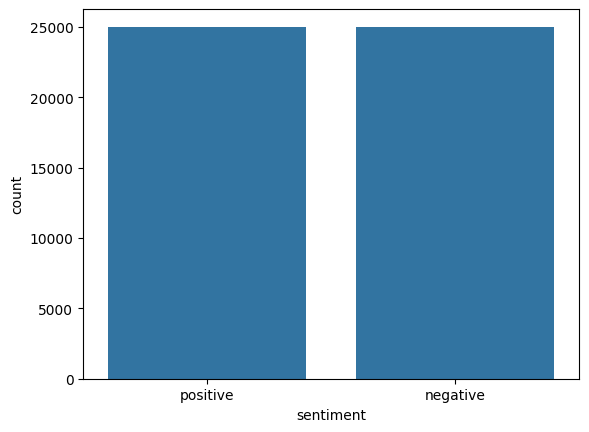

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [7]:
# target variable distribution

sns.countplot(x = 'sentiment', data = df)
plt.show()
print(df['sentiment'].value_counts())

In [8]:
# # changing positive->1 and negative->0

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


### Stop words removal, Lemmatization and Tokenization

In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Stop words removal
stop_words = set(stopwords.words('english'))

# Lemmatization
lemmatizer = WordNetLemmatizer()

# Tokenization
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]  # Stop words removal and stemming
    return ' '.join(filtered_tokens)

df['review'] = df['review'].apply(preprocess_text)

In [10]:
# Removing special characters

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return ' '.join(text.split())

df['review'] = df['review'].apply(preprocess_text)
df['review']

,review
0,one reviewer mentioned watching oz episode ll ...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically s family little boy jake think s zom...
4,petter mattei s love time money visually stunn...
...,...
49995,thought movie right good job nt creative origi...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,m going disagree previous comment side maltin ...


In [11]:
data_sample = df.sample(frac=0.4, random_state=42)
X = data_sample['review']
y = data_sample['sentiment']

### Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
df_new = vectorizer.fit_transform(X)
df_new

<20000x79608 sparse matrix of type '<class 'numpy.float64'>'
	with 1921894 stored elements in Compressed Sparse Row format>

In [13]:
df_new.shape

(20000, 79608)

### Dateset Splitting, Model Building and Evaluation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)


In [15]:
results = []
for model_name, model in [
    ('Logistic Regression', LogisticRegression(solver='saga', penalty='l2', C=0.1, max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, max_features='sqrt', random_state=42))
]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': model_name,
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Train Accuracy': accuracy_score(y_train, model.predict(X_train)),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 score': f1_score(y_test, y_pred),
        'Train confusion matrix': confusion_matrix(y_train, model.predict(X_train)),
        'Test confusion matrix': confusion_matrix(y_test, y_pred)
    })

In [16]:
for model_name, model in [
    ('XG boost classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42))
]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': model_name,
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Train Accuracy': accuracy_score(y_train, model.predict(X_train)),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 score': f1_score(y_test, y_pred),
        'Train confusion matrix': confusion_matrix(y_train, model.predict(X_train)),
        'Test confusion matrix': confusion_matrix(y_test, y_pred)
    })

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# KNN classifier with the best parameters

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

results.append({
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(y_test, y_pred),
    'Train Accuracy': accuracy_score(y_train, best_knn.predict(X_train)),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 score': f1_score(y_test, y_pred),
    'Train confusion matrix': confusion_matrix(y_train, best_knn.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, y_pred)
})

In [17]:
for model_name, model in [
    ('Naive Bayes classifier', MultinomialNB())
]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': model_name,
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Train Accuracy': accuracy_score(y_train, model.predict(X_train)),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 score': f1_score(y_test, y_pred),
        'Train confusion matrix': confusion_matrix(y_train, model.predict(X_train)),
        'Test confusion matrix': confusion_matrix(y_test, y_pred)
    })

In [39]:
best_params

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

In [21]:
# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df

,Model,Test Accuracy,Train Accuracy,Precision,Recall,F1 score,Train confusion matrix,Test confusion matrix
0,Logistic Regression,0.84525,0.870437,0.816644,0.891218,0.852303,"[[6685, 1308], [765, 7242]]","[[1595, 401], [218, 1786]]"
1,Random Forest,0.82950,0.880563,0.805171,0.870259,0.836451,"[[6699, 1294], [617, 7390]]","[[1574, 422], [260, 1744]]"
2,XG boost classifier,0.82550,0.896000,0.802315,0.864770,0.832373,"[[6856, 1137], [527, 7480]]","[[1569, 427], [271, 1733]]"
3,Decision Tree,0.72350,0.770437,0.690739,0.811377,0.746214,"[[5437, 2556], [1117, 6890]]","[[1268, 728], [378, 1626]]"
4,Naive Bayes classifier,0.85925,0.923687,0.881015,0.831337,0.855456,"[[7566, 427], [794, 7213]]","[[1771, 225], [338, 1666]]"
5,KNN Classifier,0.77100,1.000000,0.760038,0.793413,0.776367,"[[7993, 0], [0, 8007]]","[[1494, 502], [414, 1590]]"
